In [ ]:
conda install -c anaconda python-graphviz

In [ ]:
conda install -c anaconda pydot

In [ ]:
pip install seaborn

In [ ]:
pip install helper_functions

In [ ]:
pip install opencv-python

In [1]:
import sklearn
import pandas
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,GridSearchCV,ParameterGrid
from sklearn.model_selection import KFold,RepeatedKFold

import matplotlib                # Matplotlib is the plotting package that we'll use throughout the lab
import matplotlib.pyplot as plt
import seaborn as sns            # Seaborn is a Python data visualization library based on matplotlib

import numpy as np               # Numpy is a package for scientific computing. We'll use it for some of it's math functions

import graphviz                  # graphviz is a package that helps visualize decision trees

In [2]:
df = pandas.read_csv("./data/corona_tested_individuals_ver_0083.english.csv", low_memory=False)
df.head()

#we should probably drop test_date. 
#shape of the data is (2742596, 10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [3]:
raw_data = df.sample(10000)
print(raw_data.shape)

(10000, 10)


In [4]:
#drop test_date
raw_data.drop(columns=['test_date'], inplace=True)
raw_data.head()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
2052335,0,0,0,0,0,negative,No,female,Other
1132126,0,0,0,0,0,negative,No,male,Other
826058,0,0,0,0,0,negative,No,male,Other
1746964,0,0,0,0,0,negative,No,female,Other
2501065,1,0,0,0,0,negative,NaN,male,Other


In [5]:
#we want to turn: all categorical labels into their own 0 - 1 values, plus corona_results should be 0 for negative, 1 for positive
corona_result_map = {
    'negative': 0,
    'positive': 1
}

age_map = {
    'No': 0,
    'Yes': 1,
    'NaN' : 0
}

gender_map = {
    'female': 0,
    'male': 1
}

raw_data.replace({
    'corona_result': corona_result_map,
    'age_60_and_above': age_map,
    'gender': gender_map    
    }, inplace=True)


#melt test_indication into numerical
raw_data = pandas.concat([raw_data, pandas.get_dummies(raw_data['test_indication'])], axis = 1)
raw_data.drop(columns=['test_indication'], inplace=True)

# Replace any column with the value 'NaN' or 'other' with 0
raw_data['age_60_and_above'] = raw_data['age_60_and_above'].fillna(0)
raw_data['corona_result'] = raw_data['corona_result'].fillna(0)
raw_data['gender'] = raw_data['gender'].fillna(0)
raw_data['corona_result'].replace({'other' : 0}, inplace=True)

raw_data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Abroad,Contact with confirmed,Other
2052335,0,0,0,0,0,0,0.0,0.0,0,0,1
1132126,0,0,0,0,0,0,0.0,1.0,0,0,1
826058,0,0,0,0,0,0,0.0,1.0,0,0,1
1746964,0,0,0,0,0,0,0.0,0.0,0,0,1
2501065,1,0,0,0,0,0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
154603,0,0,0,0,0,0,0.0,1.0,0,0,1
1615308,0,0,0,0,0,0,0.0,1.0,0,0,1
2208948,0,0,0,0,0,0,0.0,0.0,0,0,1
292618,0,0,0,0,0,0,1.0,0.0,0,0,1


In [6]:
 # Split the output from the input/features
features_df = raw_data.drop(columns=['corona_result'])
X = features_df 

# Output/Targets
y = raw_data["corona_result"] 

In [7]:
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True)

In [8]:
# Configure Random Forest Classifier Model
Default_model = RandomForestClassifier(n_estimators=1,bootstrap=False).fit(X_train,y_train) # fit the decision tree model
print('Model training complete.')

Model training complete.


In [9]:
Train_predictions = Default_model.predict(X_train)    # Make predictions on training data
Test_predictions = Default_model.predict(X_test)      # Make predictions on testing data

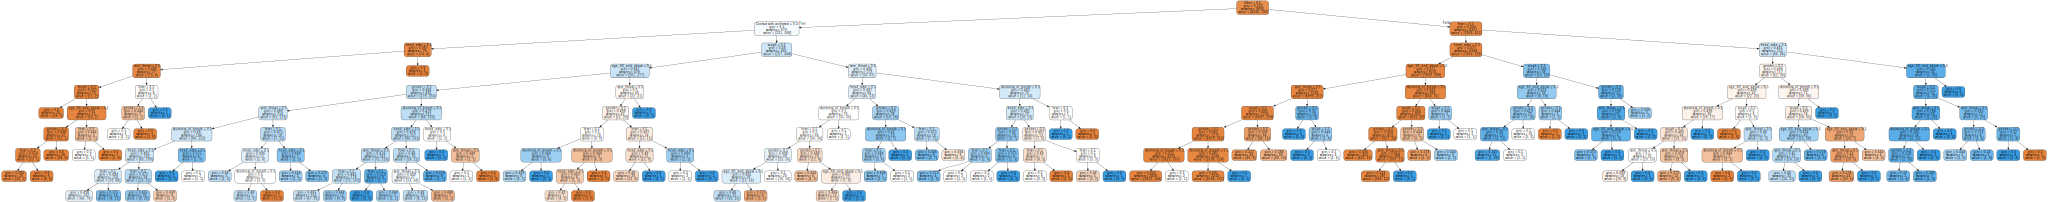

In [10]:
# generate an image of the default decision tree
dot_data = sklearn.tree.export_graphviz(Default_model.estimators_[0],out_file=None,feature_names=features_df.columns,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph